# Student performance
Interactive vs non interactive

In [77]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

sns.set_context('talk')
sns.set_style('white')

Load Natalia's data

In [78]:
student_data_natalia = pd.read_csv('student_behavior_natalia.csv')
student_data_natalia.head()

,time_elapsed,teacher,problem,num_trial,num_hint,bets,bonus,worker,trial_order,order,bets_sorted,belief_in_true
0,181304,sub-04,34,0,0,"[0, 35, 41, 48]",0.013777,133,0,"['B', 'D', 'A', 'C']","[41, 0, 48, 35]",0.330645
1,192911,sub-04,34,0,1,"[0, 50, 49, 0]",0.020623,133,0,"['B', 'D', 'A', 'C']","[49, 0, 0, 50]",0.494949
2,203582,sub-04,34,0,2,"[0, 0, 100, 0]",0.041667,133,0,"['B', 'D', 'A', 'C']","[100, 0, 0, 0]",1.000000
3,223655,sub-27,15,1,0,"[0, 52, 50, 48]",0.014444,133,0,"['B', 'A', 'D', 'C']","[52, 0, 48, 50]",0.346667
4,232054,sub-27,15,1,1,"[0, 52, 50, 0]",0.021242,133,0,"['B', 'A', 'D', 'C']","[52, 0, 0, 50]",0.509804


Load my data

In [79]:
folder_names = [
    'exp3-2023-11-08-15-24-46',
    'exp3-2023-11-08-18-43-09',
    'exp3-2023-11-09-19-59-27',
    'exp3-2023-11-13-15-37-53',
    'exp3-2023-11-13-17-12-57',
    'exp3-2023-11-16-17-24-56',
    'exp3-2023-11-18-12-56-00',
    'exp3-2023-11-18-14-09-28',
    'exp3-2023-11-18-16-01-39'
]

base_dir = '../../experiments/exp3/'

def get_data(folder_name):
    data = pd.read_csv(base_dir + folder_name + '/playerRounds.csv')
    data['folder_name'] = folder_name
    return data

## Get data from each folder, combine into one dataframe
student_data = pd.concat([get_data(folder_name) for folder_name in folder_names])
student_data = student_data.reset_index(drop=True)

# Get rid of duplicate rows
student_data = student_data.drop_duplicates()

In [80]:
student_data.head()

,id,gameID,gameIDLastChangedAt,roundID,roundIDLastChangedAt,playerID,playerIDLastChangedAt,hypothesis_order,hypothesis_orderLastChangedAt,original_problem_idx,...,selectedCellsSoFarLastChangedAt,batchID,batchIDLastChangedAt,sliderValuesSoFar,sliderValuesSoFarLastChangedAt,bonusSoFar,bonusSoFarLastChangedAt,thisRoundBonus,thisRoundBonusLastChangedAt,folder_name
0,01HENX7PHMEW5ECGM26YAD1BC2,01HENVJVWKSGMDC9PH26HGF0W8,2023-11-07T22:07:49.812588647Z,01HENX7N2H8GWYQZJM6N8MA3AC,2023-11-07T22:07:49.812588647Z,01HENWVSXMWFD6CJDJR7YG2F5J,2023-11-07T22:07:49.812588647Z,"[""C"",""D"",""B"",""A""]",2023-11-07T22:07:50.185779842Z,NaN,...,2023-11-07T22:07:50.185779842Z,01HENVJVWB75HZVQ3YEMS9MH83,2023-11-07T22:07:49.812588647Z,NaN,NaN,NaN,NaN,NaN,NaN,exp3-2023-11-08-15-24-46
1,01HENX7PPH62W59515WQ81CZ91,01HENVJVWKSGMDC9PH26HGF0W8,2023-11-07T22:07:49.969786591Z,01HENX7N2H8GWYQZJM6N8MA3AC,2023-11-07T22:07:49.969786591Z,01HENX03CYCBNFSW9XCWM7MN74,2023-11-07T22:07:49.969786591Z,"[""B"",""A"",""D"",""C""]",2023-11-07T22:07:50.185779842Z,NaN,...,NaN,01HENVJVWB75HZVQ3YEMS9MH83,2023-11-07T22:07:49.969786591Z,"[{""A"":0,""B"":0,""C"":0,""D"":0}]",2023-11-07T22:07:50.185779842Z,NaN,NaN,NaN,NaN,exp3-2023-11-08-15-24-46
2,01HENX8267Q1VA6HKW0F0WGE1B,01HENVJVWKSGMDC9PH26HGF0W8,2023-11-07T22:08:01.735254105Z,01HENX7N30NJP3Y6TY36W48RRM,2023-11-07T22:08:01.735254105Z,01HENWVSXMWFD6CJDJR7YG2F5J,2023-11-07T22:08:01.735254105Z,"[""A"",""B"",""C"",""D""]",2023-11-07T22:08:01.768610753Z,39.0,...,2023-11-07T22:09:19.709937121Z,01HENVJVWB75HZVQ3YEMS9MH83,2023-11-07T22:08:01.735254105Z,NaN,NaN,0.333333,2023-11-07T22:09:26.157375409Z,0.333333,2023-11-07T22:09:26.157375409Z,exp3-2023-11-08-15-24-46
3,01HENX826G968MHXBSH2TQF0R2,01HENVJVWKSGMDC9PH26HGF0W8,2023-11-07T22:08:01.744651373Z,01HENX7N30NJP3Y6TY36W48RRM,2023-11-07T22:08:01.744651373Z,01HENX03CYCBNFSW9XCWM7MN74,2023-11-07T22:08:01.744651373Z,"[""C"",""B"",""D"",""A""]",2023-11-07T22:08:01.768610753Z,39.0,...,NaN,01HENVJVWB75HZVQ3YEMS9MH83,2023-11-07T22:08:01.744651373Z,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":21,""B"":28,""C"":...",2023-11-07T22:09:26.157375409Z,0.333333,2023-11-07T22:09:26.157375409Z,0.333333,2023-11-07T22:09:26.157375409Z,exp3-2023-11-08-15-24-46
4,01HENXAW67RMC0SJJFMB28MTMR,01HENVJVWKSGMDC9PH26HGF0W8,2023-11-07T22:09:33.895780371Z,01HENX7N4AYSBJSY0K2XJDZJC8,2023-11-07T22:09:33.895780371Z,01HENWVSXMWFD6CJDJR7YG2F5J,2023-11-07T22:09:33.895780371Z,"[""B"",""A"",""C"",""D""]",2023-11-07T22:09:33.926682525Z,32.0,...,2023-11-07T22:10:37.612411136Z,01HENVJVWB75HZVQ3YEMS9MH83,2023-11-07T22:09:33.895780371Z,NaN,NaN,0.658567,2023-11-07T22:10:46.417997287Z,0.325234,2023-11-07T22:10:46.417997287Z,exp3-2023-11-08-15-24-46


In [81]:
# View column labels
print(student_data.columns)

# Filter the columns that I want
cols_to_keep = ['gameID', 'playerID', 'original_problem_idx', 'selectedCellsSoFar', 'sliderValuesSoFar', 'thisRoundBonus']
student_data = student_data[cols_to_keep]
student_data.head(15)


Index(['id', 'gameID', 'gameIDLastChangedAt', 'roundID',
       'roundIDLastChangedAt', 'playerID', 'playerIDLastChangedAt',
       'hypothesis_order', 'hypothesis_orderLastChangedAt',
       'original_problem_idx', 'original_problem_idxLastChangedAt',
       'selectedCellsSoFar', 'selectedCellsSoFarLastChangedAt', 'batchID',
       'batchIDLastChangedAt', 'sliderValuesSoFar',
       'sliderValuesSoFarLastChangedAt', 'bonusSoFar',
       'bonusSoFarLastChangedAt', 'thisRoundBonus',
       'thisRoundBonusLastChangedAt', 'folder_name'],
      dtype='object')


,gameID,playerID,original_problem_idx,selectedCellsSoFar,sliderValuesSoFar,thisRoundBonus
0,01HENVJVWKSGMDC9PH26HGF0W8,01HENWVSXMWFD6CJDJR7YG2F5J,NaN,[],NaN,NaN
1,01HENVJVWKSGMDC9PH26HGF0W8,01HENX03CYCBNFSW9XCWM7MN74,NaN,NaN,"[{""A"":0,""B"":0,""C"":0,""D"":0}]",NaN
2,01HENVJVWKSGMDC9PH26HGF0W8,01HENWVSXMWFD6CJDJR7YG2F5J,39.0,"[[0,0],[5,5],[2,2]]",NaN,0.333333
3,01HENVJVWKSGMDC9PH26HGF0W8,01HENX03CYCBNFSW9XCWM7MN74,39.0,NaN,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":21,""B"":28,""C"":...",0.333333
4,01HENVJVWKSGMDC9PH26HGF0W8,01HENWVSXMWFD6CJDJR7YG2F5J,32.0,"[[1,2],[4,3],[4,2]]",NaN,0.325234
5,01HENVJVWKSGMDC9PH26HGF0W8,01HENX03CYCBNFSW9XCWM7MN74,32.0,NaN,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":27,""B"":27,""C"":...",0.325234
6,01HENVJVWKSGMDC9PH26HGF0W8,01HENWVSXMWFD6CJDJR7YG2F5J,27.0,"[[4,1],[2,4],[4,4]]",NaN,0.325664
7,01HENVJVWKSGMDC9PH26HGF0W8,01HENX03CYCBNFSW9XCWM7MN74,27.0,NaN,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":14,""B"":11,""C"":...",0.325664
8,01HENVJVWKSGMDC9PH26HGF0W8,01HENWVSXMWFD6CJDJR7YG2F5J,8.0,"[[1,0],[5,2],[5,0]]",NaN,0.400000
9,01HENVJVWKSGMDC9PH26HGF0W8,01HENX03CYCBNFSW9XCWM7MN74,8.0,NaN,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":15,""B"":25,""C"":...",0.400000


In [82]:
print("Total rows in sliderValuesSoFar:", len(student_data))
print("Non-NaN rows in sliderValuesSoFar:", student_data['sliderValuesSoFar'].dropna().shape[0])

# check dtype of sliderValuesSoFar
print("dtype of sliderValuesSoFar:", student_data['sliderValuesSoFar'].dtype)


Total rows in sliderValuesSoFar: 572
Non-NaN rows in sliderValuesSoFar: 286
dtype of sliderValuesSoFar: object


In [83]:
# for the rows where gameID and playerID and original_problem_idx are the same, combine into one row
# use the value that is not NaN for selectedCellsSoFar and sliderValuesSoFar

student_data = student_data.groupby(['gameID', 'original_problem_idx', 'thisRoundBonus']).agg({
    'sliderValuesSoFar': lambda x: np.nan if all(pd.isna(x)) else x.dropna().iloc[0],
    'selectedCellsSoFar': lambda x: np.nan if all(pd.isna(x)) else x.dropna().iloc[0]
}).reset_index()

In [84]:
student_data.head()

,gameID,original_problem_idx,thisRoundBonus,sliderValuesSoFar,selectedCellsSoFar
0,01HENVJVWKSGMDC9PH26HGF0W8,2.0,0.40000,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":10,""B"":9,""C"":1...","[[2,2],[3,3],[2,3]]"
1,01HENVJVWKSGMDC9PH26HGF0W8,4.0,0.40000,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":0,""B"":0,""C"":0,...","[[4,0],[4,5],[5,5]]"
2,01HENVJVWKSGMDC9PH26HGF0W8,7.0,0.40000,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":0,""B"":0,""C"":12...","[[1,2],[],[5,3]]"
3,01HENVJVWKSGMDC9PH26HGF0W8,8.0,0.40000,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":15,""B"":25,""C"":...","[[1,0],[5,2],[5,0]]"
4,01HENVJVWKSGMDC9PH26HGF0W8,9.0,0.36036,"[{""A"":0,""B"":0,""C"":0,""D"":0},{""A"":0,""B"":7,""C"":0,...","[[5,1],[3,1],[0,4]]"


More data cleaning

In [85]:
# Change dtype of sliderValuesSoFar and selectedCellsSoFar to list
student_data['sliderValuesSoFar'] = student_data['sliderValuesSoFar'].apply(literal_eval)
student_data['selectedCellsSoFar'] = student_data['selectedCellsSoFar'].apply(literal_eval)

# Get rid of rows where the list in sliderValuesSoFar has less than four elements
student_data = student_data[student_data['sliderValuesSoFar'].map(len) >= 5]

# Get rid of first element in each list in sliderValuesSoFar
student_data['sliderValuesSoFar'] = student_data['sliderValuesSoFar'].apply(lambda x: x[1:])


In [86]:
# Add an empty list to the beginning of each list in selectedCellsSoFar
student_data['selectedCellsSoFar'] = student_data['selectedCellsSoFar'].apply(lambda x: [[]] + x)

In [87]:
# Count the number of games
num_games = student_data['gameID'].nunique()
print("Number of games:", num_games)
student_data.head()

Number of games: 21


,gameID,original_problem_idx,thisRoundBonus,sliderValuesSoFar,selectedCellsSoFar
0,01HENVJVWKSGMDC9PH26HGF0W8,2.0,0.40000,"[{'A': 10, 'B': 9, 'C': 14, 'D': 10}, {'A': 79...","[[], [2, 2], [3, 3], [2, 3]]"
1,01HENVJVWKSGMDC9PH26HGF0W8,4.0,0.40000,"[{'A': 0, 'B': 0, 'C': 0, 'D': 10}, {'A': 77, ...","[[], [4, 0], [4, 5], [5, 5]]"
2,01HENVJVWKSGMDC9PH26HGF0W8,7.0,0.40000,"[{'A': 0, 'B': 0, 'C': 12, 'D': 0}, {'A': 79, ...","[[], [1, 2], [], [5, 3]]"
3,01HENVJVWKSGMDC9PH26HGF0W8,8.0,0.40000,"[{'A': 15, 'B': 25, 'C': 10, 'D': 20}, {'A': 3...","[[], [1, 0], [5, 2], [5, 0]]"
4,01HENVJVWKSGMDC9PH26HGF0W8,9.0,0.36036,"[{'A': 0, 'B': 7, 'C': 0, 'D': 0}, {'A': 53, '...","[[], [5, 1], [3, 1], [0, 4]]"


In [88]:
# Pivot longer so that each row corresponds to one element in sliderValuesSoFar and selectedCellsSoFar
# Add a column called 'round' where the number corresponds to the index of the value in sliderValuesSoFar and selectedCellsSoFar

df_exploded = student_data.explode(['sliderValuesSoFar', 'selectedCellsSoFar'])

# Resetting the index
df_exploded.reset_index(drop=True, inplace=True)

# Adding 'round' column
df_exploded['num_hint'] = df_exploded.groupby(['gameID', 'original_problem_idx']).cumcount()

df_exploded.head()

# combined_df.head()

,gameID,original_problem_idx,thisRoundBonus,sliderValuesSoFar,selectedCellsSoFar,num_hint
0,01HENVJVWKSGMDC9PH26HGF0W8,2.0,0.4,"{'A': 10, 'B': 9, 'C': 14, 'D': 10}",[],0
1,01HENVJVWKSGMDC9PH26HGF0W8,2.0,0.4,"{'A': 79, 'B': 9, 'C': 14, 'D': 10}","[2, 2]",1
2,01HENVJVWKSGMDC9PH26HGF0W8,2.0,0.4,"{'A': 100, 'B': 0, 'C': 0, 'D': 0}","[3, 3]",2
3,01HENVJVWKSGMDC9PH26HGF0W8,2.0,0.4,"{'A': 100, 'B': 0, 'C': 0, 'D': 0}","[2, 3]",3
4,01HENVJVWKSGMDC9PH26HGF0W8,4.0,0.4,"{'A': 0, 'B': 0, 'C': 0, 'D': 10}",[],0


In [89]:
# Add a column called 'bets' where each value is a list of the values in each sliderValuesSoFar dictionary
df_exploded['bets'] = df_exploded['sliderValuesSoFar'].apply(lambda x: list(x.values()))
df_exploded['belief_in_true'] = df_exploded.bets.apply(lambda b: b[0]/sum(b) if sum(b) > 0 else 0)

# Change problem index to an int
df_exploded['original_problem_idx'] = df_exploded['original_problem_idx'].astype(int)
df_exploded

,gameID,original_problem_idx,thisRoundBonus,sliderValuesSoFar,selectedCellsSoFar,num_hint,bets,belief_in_true
0,01HENVJVWKSGMDC9PH26HGF0W8,2,0.4,"{'A': 10, 'B': 9, 'C': 14, 'D': 10}",[],0,"[10, 9, 14, 10]",0.232558
1,01HENVJVWKSGMDC9PH26HGF0W8,2,0.4,"{'A': 79, 'B': 9, 'C': 14, 'D': 10}","[2, 2]",1,"[79, 9, 14, 10]",0.705357
2,01HENVJVWKSGMDC9PH26HGF0W8,2,0.4,"{'A': 100, 'B': 0, 'C': 0, 'D': 0}","[3, 3]",2,"[100, 0, 0, 0]",1.000000
3,01HENVJVWKSGMDC9PH26HGF0W8,2,0.4,"{'A': 100, 'B': 0, 'C': 0, 'D': 0}","[2, 3]",3,"[100, 0, 0, 0]",1.000000
4,01HENVJVWKSGMDC9PH26HGF0W8,4,0.4,"{'A': 0, 'B': 0, 'C': 0, 'D': 10}",[],0,"[0, 0, 0, 10]",0.000000
...,...,...,...,...,...,...,...,...
939,01HFJ17QHRTSCYDB1P6ZZ1KR75,31,0.4,"{'A': 96, 'B': 0, 'C': 0, 'D': 0}","[1, 3]",3,"[96, 0, 0, 0]",1.000000
940,01HFJ17QHRTSCYDB1P6ZZ1KR75,33,0.4,"{'A': 52, 'B': 45, 'C': 44, 'D': 45}",[],0,"[52, 45, 44, 45]",0.279570
941,01HFJ17QHRTSCYDB1P6ZZ1KR75,33,0.4,"{'A': 84, 'B': 47, 'C': 0, 'D': 0}","[1, 5]",1,"[84, 47, 0, 0]",0.641221
942,01HFJ17QHRTSCYDB1P6ZZ1KR75,33,0.4,"{'A': 99, 'B': 8, 'C': 0, 'D': 0}","[4, 4]",2,"[99, 8, 0, 0]",0.925234


<AxesSubplot:>

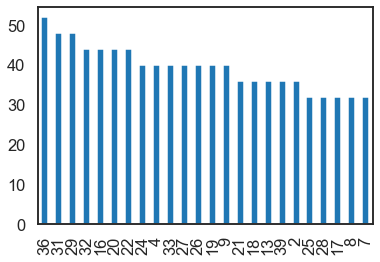

In [90]:
# Look at frequency for each problem; make histogram
df_exploded['original_problem_idx'].value_counts().plot(kind='bar')

[Text(0.5, 0, '# Examples'), Text(0, 0.5, 'Bets on correct answer')]

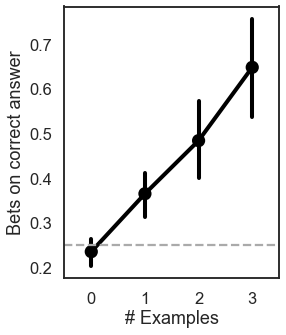

In [91]:
avg_student_belief = df_exploded.groupby(['gameID', 'num_hint']).agg({'belief_in_true': 'mean'}).reset_index()
fig,ax=plt.subplots(figsize=(5/1.3,5))
sns.pointplot(data=avg_student_belief,x='num_hint',y='belief_in_true', color='k', linewidth=4, ax=ax)
ax.axhline(y=0.25, linestyle='--', color='#aaa')
ax.set(xlabel='# Examples', ylabel='Bets on correct answer')


Natalia data

In [92]:
problem_list = [2, 4, 7, 8, 9, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 36, 39]

# only keep hte rows where problem is in problem_list (so its the same problems for both)
student_data_natalia = student_data_natalia[student_data_natalia['problem'].isin(problem_list)]

[Text(0.5, 0, '# Examples'), Text(0, 0.5, 'Bets on correct answer')]

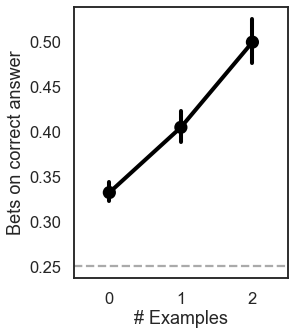

In [93]:
avg_student_belief_natalia = student_data_natalia.groupby(['worker', 'num_hint']).agg({'belief_in_true': 'mean'}).reset_index()
fig,ax=plt.subplots(figsize=(5/1.3,5))
sns.pointplot(data=avg_student_belief_natalia,x='num_hint',y='belief_in_true', color='k', linewidth=4, ax=ax)
ax.axhline(y=0.25, linestyle='--', color='#aaa')
ax.set(xlabel='# Examples', ylabel='Bets on correct answer')

# plt.savefig('plots/student_belief.pdf', bbox_inches='tight')

## Put the plots together

In [94]:
# stack the two dataframes, add a column called 'interactive' that is 'no' for avg_student_belief_natalia and 'yes' for avg_student_belief
avg_student_belief_natalia['interactive'] = 'no'
avg_student_belief_natalia['num_hint'] = avg_student_belief_natalia['num_hint'] + 1
avg_student_belief['interactive'] = 'yes'

avg_student_beliefs = pd.concat([avg_student_belief, avg_student_belief_natalia])

[Text(0.5, 0, '# Examples'), Text(0, 0.5, 'Bets on correct answer')]

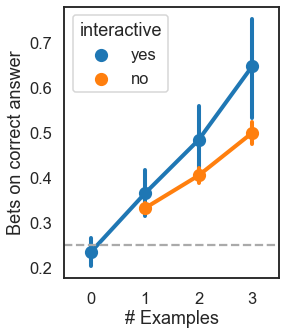

In [95]:
fig,ax=plt.subplots(figsize=(5/1.3,5))
sns.pointplot(data=avg_student_beliefs,x='num_hint',y='belief_in_true', hue='interactive', linewidth=4, ax=ax)
ax.axhline(y=0.25, linestyle='--', color='#aaa')
ax.set(xlabel='# Examples', ylabel='Bets on correct answer')

### Look at how people do on individual problems, interactive vs non interactive

In [96]:
student_data_natalia['interactive'] = 'no'
df_exploded['interactive'] = 'yes'

student_data_natalia = student_data_natalia[['problem', 'worker', 'num_hint', 'belief_in_true', 'interactive']]
df_exploded = df_exploded[['original_problem_idx', 'gameID', 'num_hint', 'belief_in_true', 'interactive']]

# in df_exploded, rename gameID to worker, original_problem_idx to problem
df_exploded = df_exploded.rename(columns={'gameID': 'worker', 'original_problem_idx': 'problem'})

# stack the two dataframes
student_beliefs = pd.concat([df_exploded, student_data_natalia])

In [97]:
student_beliefs

,problem,worker,num_hint,belief_in_true,interactive
0,2,01HENVJVWKSGMDC9PH26HGF0W8,0,0.232558,yes
1,2,01HENVJVWKSGMDC9PH26HGF0W8,1,0.705357,yes
2,2,01HENVJVWKSGMDC9PH26HGF0W8,2,1.000000,yes
3,2,01HENVJVWKSGMDC9PH26HGF0W8,3,1.000000,yes
4,4,01HENVJVWKSGMDC9PH26HGF0W8,0,0.000000,yes
...,...,...,...,...,...
16139,25,3,1,0.404762,no
16140,25,3,2,0.571429,no
16141,20,3,0,0.245098,no
16142,20,3,1,0.293578,no


    problem  belief_in_true
7        17        0.316774
3         8        0.316857
11       21        0.337970
14       25        0.346860
1         4        0.350165
9        19        0.364553
10       20        0.368801
5        13        0.370109
16       27        0.384996
6        16        0.395551
13       24        0.397650
0         2        0.402951
22       36        0.407051
15       26        0.416477
4         9        0.426023
19       31        0.430516
18       29        0.434792
12       22        0.451449
20       32        0.465376
23       39        0.470645
21       33        0.473695
8        18        0.473796
2         7        0.493717
17       28        0.502504


<AxesSubplot:xlabel='problem', ylabel='belief_in_true'>

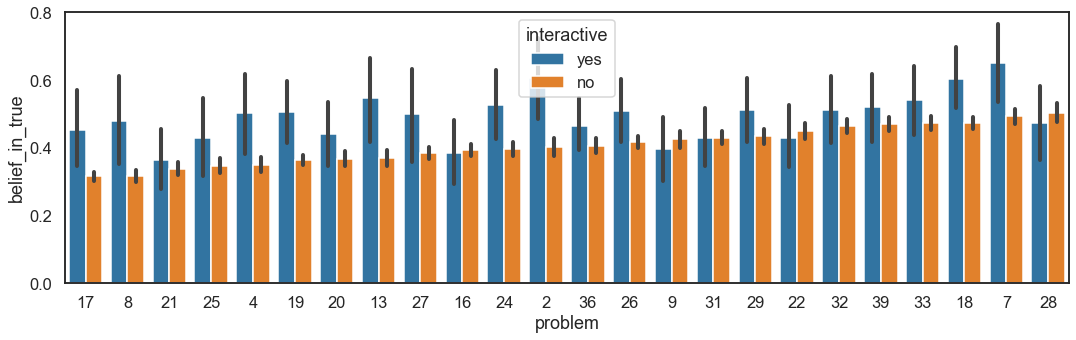

In [98]:
# Plot each problem on the x axis, and the average student belief on the y axis. The color of the point is whether it is interactive or not.
# Do a barplot
# Sort x axis in barplot by non interactive least to greatest

# Calculate mean 'belief_in_true' for non-interactive data and sort
non_interactive_means = student_beliefs[student_beliefs['interactive'] == 'no'].groupby('problem')['belief_in_true'].mean().reset_index()
sorted_means = non_interactive_means.sort_values(by='belief_in_true')
print(sorted_means)

# Create a list of sorted problems
sorted_problems = sorted_means['problem'].tolist()


fig,ax=plt.subplots(figsize=(18,5))
sns.barplot(data=student_beliefs, x='problem', y='belief_in_true', hue='interactive', ax=ax, order=sorted_problems)